In [ ]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-32-184ca7a99df8>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [ ]:
# function (as a function)
x = np.linspace(-2,2,2001)
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
  return 6*x - 3

In [ ]:
# random starting point
localmin = np.random.choice(x,1)
initval = localmin[:] # store the initial value

# learning parameters
learning_rate = .01
training_epochs = 50

# run through training and store all the results
modelparamsFixed = np.zeros((training_epochs,3))
for i in range(training_epochs):

  # compute gradient
  grad = deriv(localmin)

  # non adaptive learning rate
  lr = learning_rate

  # update parameters
  localmin = localmin - lr*grad
  modelparamsFixed[i,0] = localmin
  modelparamsFixed[i,1] = grad
  modelparamsFixed[i,2] = lr


<ipython-input-38-4dd438e5de70>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsFixed[i,0] = localmin
<ipython-input-38-4dd438e5de70>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsFixed[i,1] = grad


In [ ]:
# random starting point
localmin = np.random.choice(x,1)
initval = localmin[:] # store the initial value

# learning parameters
learning_rate = .01
training_epochs = 50

# run through training and store all the results
modelparamsGrad = np.zeros((training_epochs,3))
for i in range(training_epochs):

  # compute gradient
  grad = deriv(localmin)

  # adapt the learning rate according to the gradient
  lr = learning_rate*np.abs(grad)

  # update parameter according to g.d.
  localmin = localmin - lr*grad

  # store the parameters
  modelparamsGrad[i,0] = localmin
  modelparamsGrad[i,1] = grad
  modelparamsGrad[i,2] = lr

<ipython-input-39-4db6c0c6a714>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,0] = localmin
<ipython-input-39-4db6c0c6a714>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,1] = grad
<ipython-input-39-4db6c0c6a714>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,2] = lr


In [ ]:
# redefine parameters
learning_rate = .1
localmin = initval

# run through training and store all the results
modelparamsTime = np.zeros((training_epochs,3))
for i in range(training_epochs):
  grad = deriv(localmin)
  lr = learning_rate*(1-(i+1)/training_epochs)
  localmin = localmin - lr*grad
  modelparamsTime[i,0] = localmin
  modelparamsTime[i,1] = grad
  modelparamsTime[i,2] = lr

<ipython-input-40-a2909b7dc081>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsTime[i,0] = localmin
<ipython-input-40-a2909b7dc081>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsTime[i,1] = grad


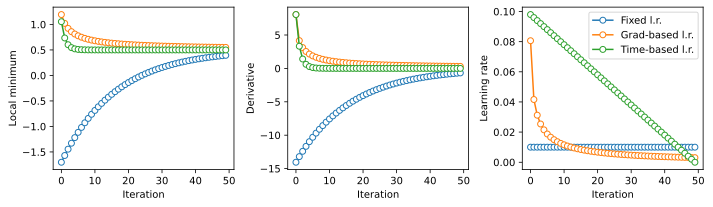

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(10,3))

# generate the plots
for i in range(3):
  ax[i].plot(modelparamsFixed[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsGrad[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsTime[:,i],'o-',markerfacecolor='w')
  ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning rate')
ax[2].legend(['Fixed l.r.','Grad-based l.r.','Time-based l.r.'])

plt.tight_layout()
plt.show()